<a href="https://colab.research.google.com/github/puru2026/DATA_ANALYTICS/blob/main/bigbasketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [45]:
!git clone https://github.com/puru2026/DATA_ANALYTICS.git

fatal: destination path 'DATA_ANALYTICS' already exists and is not an empty directory.


Reeading the data

In [5]:
bigbasket=pd.read_csv("/content/bigbasket_clean_data.csv")

In [6]:
bigbasket.head()

,Unnamed: 0,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,0,1,others,Beauty & Hygiene,Hair Care,others,220.0,220.0,Hair Oil & Serum,4.1
1,1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,others,180.0,180.0,Water & Fridge Bottles,2.3
2,2,3,others,Cleaning & Household,others,others,119.0,250.0,others,3.4
3,3,4,others,Cleaning & Household,others,Nakoda,149.0,176.0,others,3.7
4,4,5,others,Beauty & Hygiene,Bath & Hand Wash,others,162.0,162.0,Bathing Bars & Soaps,4.4


In [7]:
bigbasket.shape

(27553, 10)

In [8]:
bigbasket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27553 entries, 0 to 27552
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    27553 non-null  int64  
 1   index         27553 non-null  int64  
 2   product       27553 non-null  object 
 3   category      27553 non-null  object 
 4   sub_category  27553 non-null  object 
 5   brand         27553 non-null  object 
 6   sale_price    27553 non-null  float64
 7   market_price  27553 non-null  float64
 8   type          27553 non-null  object 
 9   rating        27553 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 2.1+ MB


In [9]:
bigbasket.isnull().sum()

,0
Unnamed: 0,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0


Performing Outlier treatment in rating column - Using IQR Method

In [10]:
Q1=bigbasket['rating'].quantile(.25)
Q3=bigbasket['rating'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
Q1,Q3,IQR,lower_limit,upper_limit


(4.0, 4.2, 0.20000000000000018, 3.6999999999999997, 4.5)

In [11]:
outliers=bigbasket[(bigbasket['rating']<lower_limit) | (bigbasket['rating']>upper_limit)]
outliers.head()

,Unnamed: 0,index,product,category,sub_category,brand,sale_price,market_price,type,rating
1,1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,others,180.0,180.0,Water & Fridge Bottles,2.3
2,2,3,others,Cleaning & Household,others,others,119.0,250.0,others,3.4
5,5,6,others,Cleaning & Household,others,others,169.0,199.0,others,3.3
6,6,7,others,Beauty & Hygiene,Skin Care,others,58.0,58.0,Face Care,3.6
8,8,9,others,Beauty & Hygiene,Hair Care,others,1098.0,1098.0,Shampoo & Conditioner,3.5


In [12]:
outliers.shape

(6373, 10)

In [13]:
#null value treatment

In [14]:
bigbasket['rating'].median()

4.1

In [15]:
bigbasket['rating']=bigbasket['rating'].fillna(4.1)

In [16]:
bigbasket.isnull().sum()

,0
Unnamed: 0,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0


In [17]:
bigbasket.dropna(inplace=True)

In [18]:
bigbasket.isnull().sum()

,0
Unnamed: 0,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0


In [19]:
product_value=bigbasket['product'].value_counts()
product_value

,count
product,
others,27307
Turmeric Powder/Arisina Pudi,26
Extra Virgin Olive Oil,15
Cow Ghee/Tuppa,14
Olive Oil - Extra Virgin,12
Colorsilk Hair Colour With Keratin,12
Soft Drink,12
Ghee/Tuppa,11
Powder - Coriander,11


In [20]:
product_less_thn_5=product_value[product_value<5]
product_less_thn_5

,count
product,


In [21]:
def handle_product(value):
  if(value in product_less_thn_5):
    return 'others'
  else:
    return value

bigbasket['product']=bigbasket['product'].apply(handle_product)
p=bigbasket['product'].value_counts()
p

,count
product,
others,27307
Turmeric Powder/Arisina Pudi,26
Extra Virgin Olive Oil,15
Cow Ghee/Tuppa,14
Olive Oil - Extra Virgin,12
Colorsilk Hair Colour With Keratin,12
Soft Drink,12
Ghee/Tuppa,11
Powder - Coriander,11


In [22]:
#category column

In [23]:
category_value=bigbasket['category'].value_counts()
category_value

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2674
Beverages,884
"Bakery, Cakes & Dairy",851
Baby Care,610


In [24]:
#subcategory

In [25]:
sub_category_value=bigbasket['sub_category'].value_counts()
sub_category_value

,count
sub_category,
others,12159
Skin Care,2294
Health & Medicine,1133
Hair Care,1028
Storage & Accessories,1015
Fragrances & Deos,1000
Bath & Hand Wash,996
Crockery & Cutlery,890
Masalas & Spices,889


In [26]:
sub_catefory_less_thn_500=sub_category_value[sub_category_value<500]
sub_catefory_less_thn_500

,count
sub_category,


In [27]:
def handle_sub_category(value):
  if(value in sub_catefory_less_thn_500):
    return 'others'
  else:
    return value

bigbasket['sub_category']=bigbasket['sub_category'].apply(handle_sub_category)
subcat=bigbasket['sub_category'].value_counts()
subcat

,count
sub_category,
others,12159
Skin Care,2294
Health & Medicine,1133
Hair Care,1028
Storage & Accessories,1015
Fragrances & Deos,1000
Bath & Hand Wash,996
Crockery & Cutlery,890
Masalas & Spices,889


In [28]:
brand_value=bigbasket['brand'].value_counts()
brand_value

,count
brand,
others,23127
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146


In [29]:
brand_less_thn_100=brand_value[brand_value<100]
brand_less_thn_100

,count
brand,


In [30]:
def handle_brand(value):
  if(value in brand_less_thn_100):
    return 'others'
  else:
    return value

bigbasket['brand']=bigbasket['brand'].apply(handle_brand)
b=bigbasket['brand'].value_counts()
b

,count
brand,
others,23127
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
bb Combo,168
Amul,153
INATUR,146


In [31]:
bigbasket.head()

,Unnamed: 0,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,0,1,others,Beauty & Hygiene,Hair Care,others,220.0,220.0,Hair Oil & Serum,4.1
1,1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,others,180.0,180.0,Water & Fridge Bottles,2.3
2,2,3,others,Cleaning & Household,others,others,119.0,250.0,others,3.4
3,3,4,others,Cleaning & Household,others,Nakoda,149.0,176.0,others,3.7
4,4,5,others,Beauty & Hygiene,Bath & Hand Wash,others,162.0,162.0,Bathing Bars & Soaps,4.4


In [32]:
type_value=bigbasket['type'].value_counts()
type_value

,count
type,
others,18392
Face Care,1508
Ayurveda,538
Men's Deodorants,500
Shampoo & Conditioner,461
Glassware,415
Containers Sets,415
Bathing Bars & Soaps,390
Blended Masalas,380


In [33]:
type_less_thn_200=type_value[type_value<200]
type_less_thn_200

,count
type,


In [34]:
def handle_type(value):
  if(value in type_less_thn_200):
    return 'others'
  else:
    return value

bigbasket['type']=bigbasket['type'].apply(handle_type)
t=bigbasket['type'].value_counts()
t

,count
type,
others,18392
Face Care,1508
Ayurveda,538
Men's Deodorants,500
Shampoo & Conditioner,461
Glassware,415
Containers Sets,415
Bathing Bars & Soaps,390
Blended Masalas,380


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#bar plot for t

<Axes: xlabel='type'>

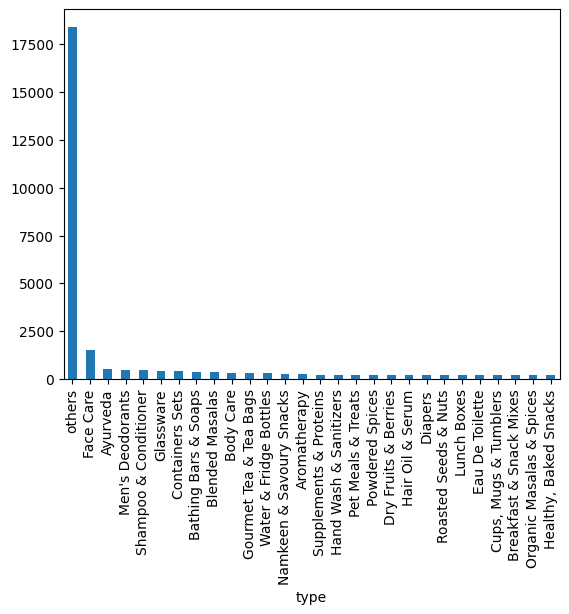

In [37]:
t.plot(kind='bar')

<Axes: xlabel='brand'>

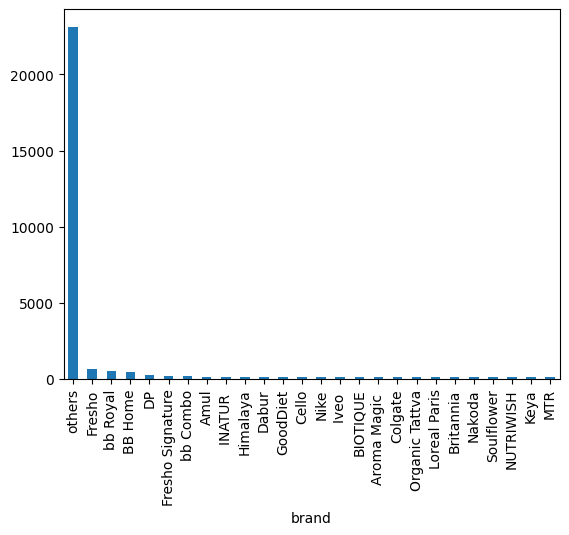

In [38]:
b.plot(kind='bar')

<Axes: xlabel='sub_category'>

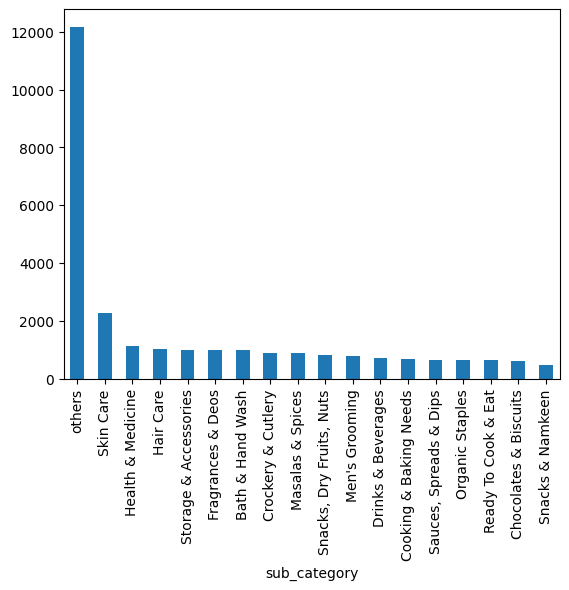

In [39]:
subcat.plot(kind='bar')

In [40]:
bigbasket.head()

,Unnamed: 0,index,product,category,sub_category,brand,sale_price,market_price,type,rating
0,0,1,others,Beauty & Hygiene,Hair Care,others,220.0,220.0,Hair Oil & Serum,4.1
1,1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,others,180.0,180.0,Water & Fridge Bottles,2.3
2,2,3,others,Cleaning & Household,others,others,119.0,250.0,others,3.4
3,3,4,others,Cleaning & Household,others,Nakoda,149.0,176.0,others,3.7
4,4,5,others,Beauty & Hygiene,Bath & Hand Wash,others,162.0,162.0,Bathing Bars & Soaps,4.4


In [41]:
bigbasket.drop(['brand'],axis=1,inplace=True)

In [42]:
bigbasket.head()

,Unnamed: 0,index,product,category,sub_category,sale_price,market_price,type,rating
0,0,1,others,Beauty & Hygiene,Hair Care,220.0,220.0,Hair Oil & Serum,4.1
1,1,2,others,"Kitchen, Garden & Pets",Storage & Accessories,180.0,180.0,Water & Fridge Bottles,2.3
2,2,3,others,Cleaning & Household,others,119.0,250.0,others,3.4
3,3,4,others,Cleaning & Household,others,149.0,176.0,others,3.7
4,4,5,others,Beauty & Hygiene,Bath & Hand Wash,162.0,162.0,Bathing Bars & Soaps,4.4


In [43]:
bigbasket.to_csv('bigbasketclean.csv')